# Active Surface FITS Explained
In which we attempt to explain the contents of the Active Surface FITS files via illustrated examples.

In [1]:
# %matplotlib notebook
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from analyzeActiveSurface import *

## Basic Structure
The Active Surface FITS file always contains a Primary Header with the usual basic info.  The precense of other extensions depends on whether these corrections were enabled already:

   * ZERNIKE - the zernike coefficient values for gravity model derived zernikies
   * THRMZERN - the thermal zernikie coefficient values
   * SURFACE - a more complicated table with these columns:
      * hoop - integer id
      * rib - integer id
      * INDICATED - the indicated position of the actuator, minus the zero point
      * DELTA - the commanded position minus the indicated (actual) position
      * ENABLED - boolean
      * ABSOLUTE - the indicated (actual) position of the actuator

## Scan with FEM model on
In this first scan (using the simulator), we left the FEM on by accident.  This is why INDICATED is not flat.

Zeros enabled: 1
FEM enabled: 1
Random enabled: 0
Zernikes enabled: 1
Thermal Zernikes enabled 1
The Indicated column in FITS is *actually*
the Indicated actuator values minus their zero points
Filtered min values from data, len from 2209 to 2208
Plot Indicated again, but taking into account phi
Filtered min values from data, len from 2209 to 2208
Dividing z axis by phis.
Plot Indicated again, but taking into account phi, and in x, y
Filtered min values from data, len from 2209 to 2208
Dividing z axis by phis.
Plotting in x and y.
The Absolute column in FITS is *actually*
the Indicated (readback from hardware) actuator values.
The Delta column in FITS is *actually*
the difference between the commanded and indicated (actual) positions
this will be all zeros in the simulator


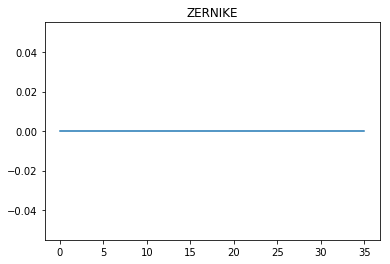

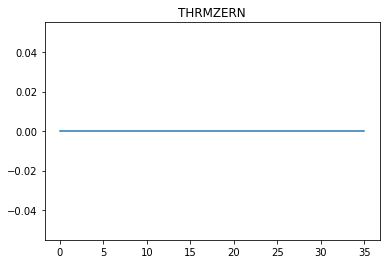

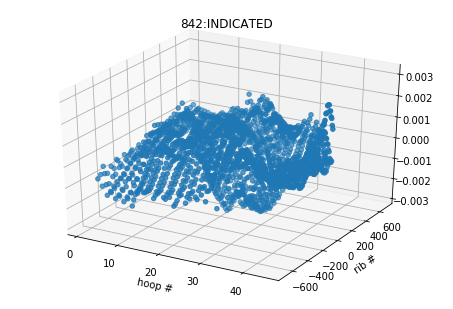

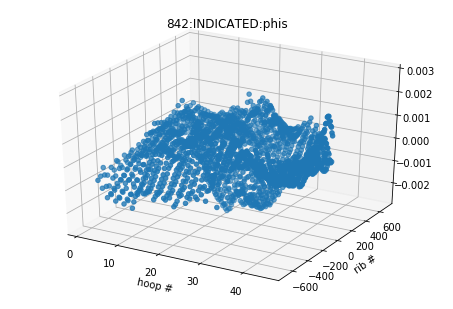

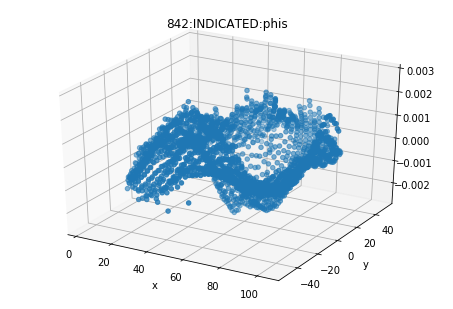

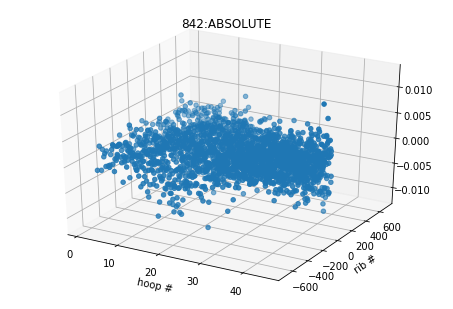

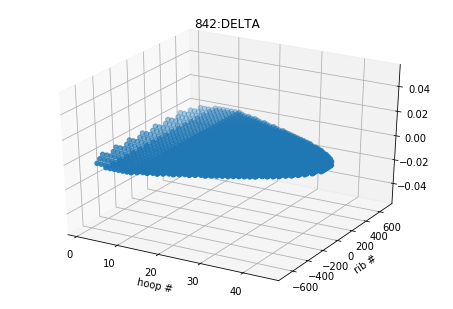

In [2]:
    fn = 'data/ActiveSurfaceMgr/2019_02_07_17:33:29.fits'
    h, r, x, y, ind, indPhi, absd = plotFile(fn, filterMin=True)

## Scan with everything off but zero points
This is why INDICATED is flat.  We had thermal zernikies on, but none of coefficients were non-zero.

Zeros enabled: 1
FEM enabled: 0
Random enabled: 0
Zernikes enabled: 1
Thermal Zernikes enabled 1
The Indicated column in FITS is *actually*
the Indicated actuator values minus their zero points
Filtered min values from data, len from 2209 to 2208
Plot Indicated again, but taking into account phi
Filtered min values from data, len from 2209 to 2208
Dividing z axis by phis.
Plot Indicated again, but taking into account phi, and in x, y
Filtered min values from data, len from 2209 to 2208
Dividing z axis by phis.
Plotting in x and y.
The Absolute column in FITS is *actually*
the Indicated (readback from hardware) actuator values.
The Delta column in FITS is *actually*
the difference between the commanded and indicated (actual) positions
this will be all zeros in the simulator


/home/sandboxes/pmargani/LASSI/versions/lassi-analysis/pmargani_lassi_env/lib/python2.7/site-packages/mpl_toolkits/mplot3d/axes3d.py:744: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


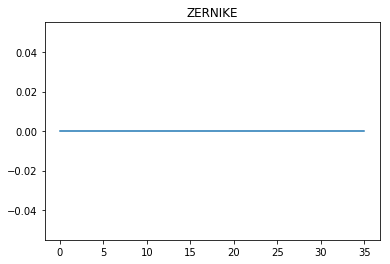

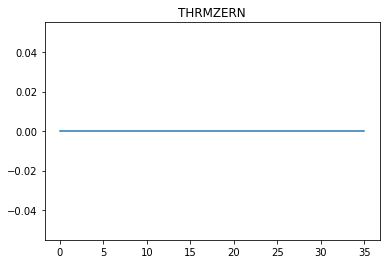

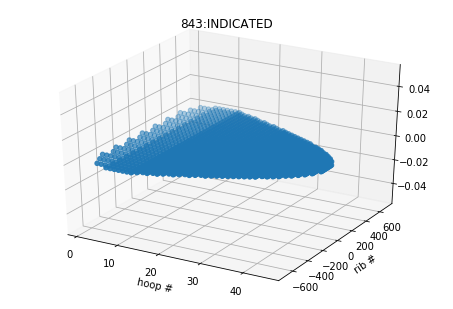

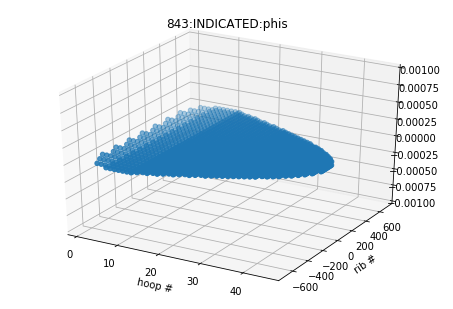

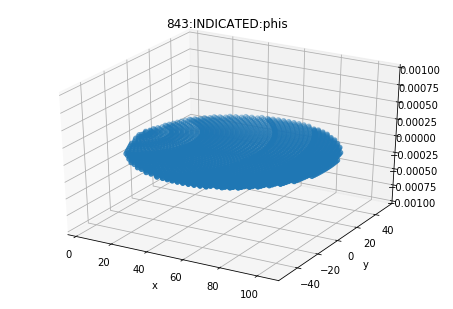

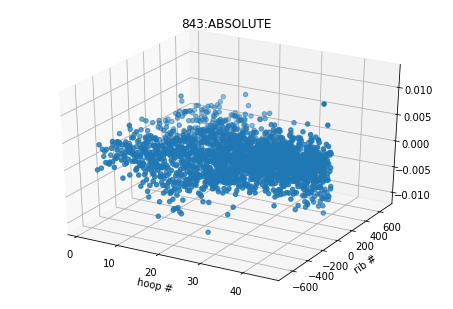

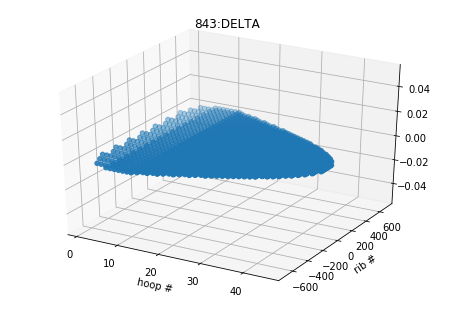

In [3]:
fn4 = "data/ActiveSurfaceMgr/2019_02_07_18:10:22.fits"
h, r, x, y, ind, indPhi, absd = plotFile(fn4, filterMin=True)

## Scan with a Zernike term
Now INDICATED reflects the actuators changed to meet the Z1 term.  Note it doesn't look like the Z1 surface because the actuators are not all normal to the surface.  When we divide by the phi values, we see that we get our 'piston' from Z1; that is the entire surface has a DC offset of about 100 microns. 
Oops, looks like we had both zernike and thermal zernikes enabled, and only changed the zernike parameter, but this example still works.

Zeros enabled: 1
FEM enabled: 0
Random enabled: 0
Zernikes enabled: 1
Thermal Zernikes enabled 1
Non-zero zernikies for ZERNIKE
0: 100.00
The Indicated column in FITS is *actually*
the Indicated actuator values minus their zero points
Filtered min values from data, len from 2209 to 2208
Plot Indicated again, but taking into account phi
Filtered min values from data, len from 2209 to 2208
Dividing z axis by phis.
Plot Indicated again, but taking into account phi, and in x, y
Filtered min values from data, len from 2209 to 2208
Dividing z axis by phis.
Plotting in x and y.
The Absolute column in FITS is *actually*
the Indicated (readback from hardware) actuator values.
The Delta column in FITS is *actually*
the difference between the commanded and indicated (actual) positions
this will be all zeros in the simulator


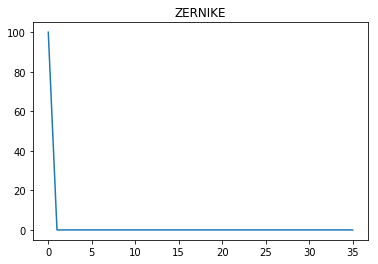

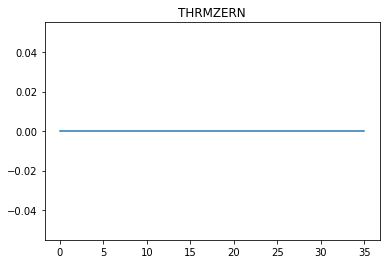

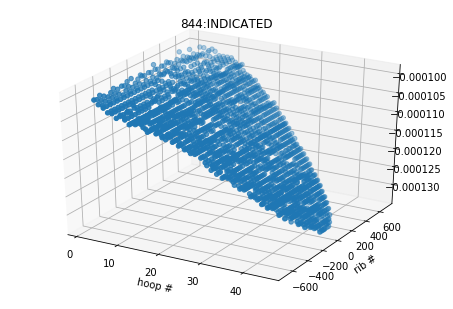

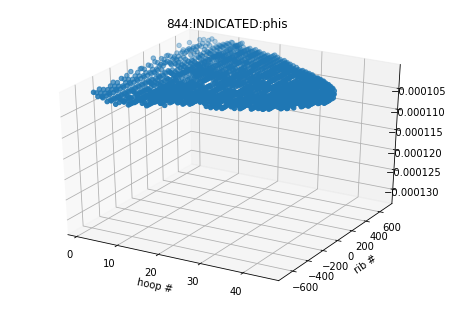

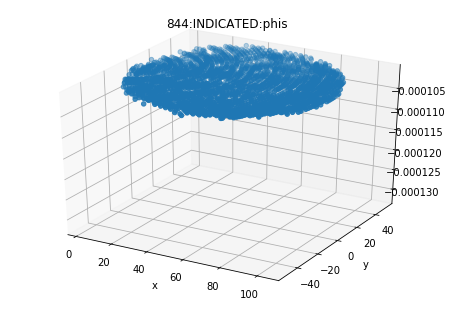

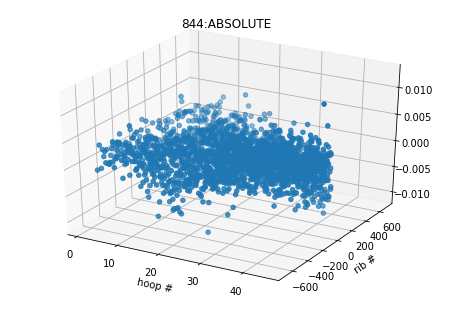

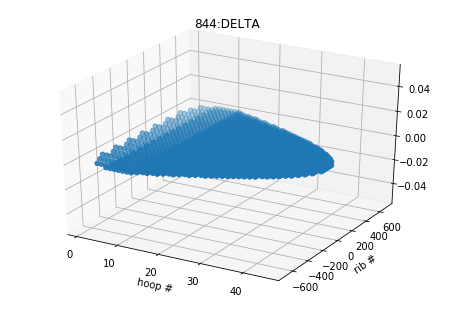

In [4]:
fn5 = "data/ActiveSurfaceMgr/2019_02_07_18:29:01.fits"
h, r, x, y, ind, indPhi, absd = plotFile(fn5, filterMin=True)

## What are those phis we are dividing by?
We get them from the AsZernike.conf file.  In this context phi is the same for each hoop
and is multiplied by the zernike's computed in the manager.  It is probably the cosine or sine of the angle between the actuator and the bore site.

In [5]:
from AsZernikeFile import AsZernikeFile
asz = AsZernikeFile("/home/gbt/etc/config/AsZernike.conf")
asz.parse()

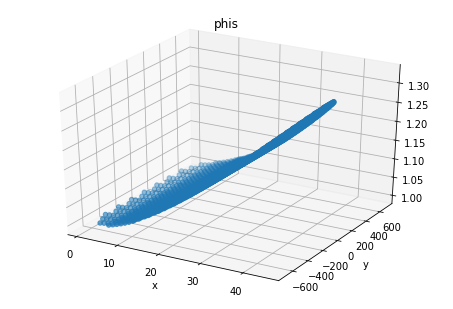

In [6]:
h = []
r = []
p = []
for act in asz.actuatorList:
    h.append(act.hoop)
    r.append(act.rib)
    p.append(act.phi)
from parabolas import scatter3dPlot
scatter3dPlot(h, r, p, "phis")